# Telcom Customer Churn 🛰

![](../../images-library/stock-market-tracking-and-stocks.jpg)


## Objectives 🚀

Predict behavior to retain customers.

Source : Kaggle Challenge : [Telcom Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)


## Context

The project is about a telecom company 🛰 : they want to **predict if a customer is about to leave**. We can analyze all relevant customer data and develop focused customer retention programs.

## Dataset

All important files used for my project saved [here](https://drive.google.com/drive/u/0/folders/1kKvppUSJ1ODAZqHWwiQ5vW-l2YN93loB)

📥 I download the dataset on [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The dataset contains about **7043 customers** with **21 features**. 

**Features** are the following:
- `customerID`: a unique ID for each customer
- `gender`: the gender of the customer
- `SeniorCitizen`: whether the customer is a senior (i.e. older than 65) or not
- `Partner`: whether the customer has a partner or not
- `Dependents`: whether the customer has people to take care of or not
- `tenure`: the number of months the customer has stayed
- `PhoneService`: whether the customer has a phone service or not
- `MultipleLines`: whether the customer has multiple telephonic lines or not
- `InternetService`: the kind of internet services the customer has (DSL, Fiber optic, no)
- `OnlineSecurity`: what online security the customer has (Yes, No, No internet service)
- `OnlineBackup`: whether the customer has online backup file system (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: whether the customer has a streaming TV device (e.g. a TV box) or not (Yes, No, No internet service)
- `StreamingMovies`: whether the customer uses streaming movies (e.g. VOD) or not (Yes, No, No internet service)
- `Contract`: the contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has electronic billing or not (Yes, No)
- `PaymentMethod`: payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: the amount charged to the customer monthly
- `TotalCharges`: the total amount the customer paid

And the **Target** :
- `Churn`: whether the customer left or not (Yes, No)

## Import

In [ ]:
#System library
import os

#Data manipulation
import pandas as pd, numpy as np

#Data visualization
import matplotlib.pyplot as plt, seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Supervised Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Metrics computed for Classification
from sklearn.metrics import classification_report, f1_score, accuracy_score

## 1. Data Exploration

### 1.1 Data Exploration and Cleaning

In [ ]:
#Define dataset path :
filepath = os.path.join('data','WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Load csv file with pandas dataframe
telcom_customers = pd.read_csv(filepath)

In [72]:
customers.shape

(7043, 21)

In [7]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
customers.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1976-AZZPJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
customers.duplicated().sum()

0

<Figure size 432x288 with 0 Axes>

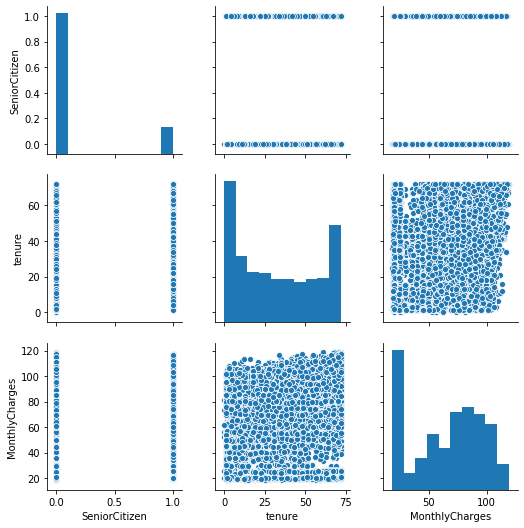

In [14]:
plt.figure()

sns.pairplot(customers)

plt.show()

### 1.2 Data Preparation

I change the type of my *Total Charges* columns (str to float) to can visualize it but I see that there is space (' ') in my column :

In [29]:
customers['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [39]:
customers[customers['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


def convert_to_numeric(x):
    try:
        return pd.to_numeric(x)
    except:
        pass

customers['TotalCharges'] = customers['TotalCharges'].apply(convert_to_numeric)

In [74]:
customers['TotalCharges'] = pd.to_numeric(customers['TotalCharges'], errors='coerce')

In [75]:
customers['TotalCharges'].isna().sum()

11

In [80]:
customers = customers.dropna()
customers.shape

(7032, 21)

In [81]:
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### I transform some columns with get_dummies functions :

In [129]:
customers.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

for column in customers.describe(include='object').columns[1:]:
    customers_cleaned = pd.concat([customers_cleaned, pd.get_dummies(customers[column], drop_first=True, prefix=column)], axis=1)
customers_cleaned

In [118]:
customers_new = pd.concat([pd.get_dummies(customers['gender'], drop_first=True, prefix='gender'), pd.get_dummies(customers['Partner'], drop_first=True, prefix='Partner'), pd.get_dummies(customers['Dependents'], drop_first=True, prefix='Dependents'), pd.get_dummies(customers['PhoneService'], drop_first=True, prefix='PhoneService'), pd.get_dummies(customers['MultipleLines'], drop_first=True, prefix='MultipleLines'), pd.get_dummies(customers['InternetService'], drop_first=True, prefix='InternetService'), pd.get_dummies(customers['OnlineSecurity'], drop_first=True, prefix='OnlineSecurity')], axis=1)

In [123]:
customers_cleaned = pd.concat([customers_new, pd.get_dummies(customers['OnlineBackup'], drop_first=True, prefix='OnlineBackup'), pd.get_dummies(customers['DeviceProtection'], drop_first=True, prefix='DeviceProtection'), pd.get_dummies(customers['TechSupport'], drop_first=True, prefix='TechSupport'), pd.get_dummies(customers['StreamingTV'], drop_first=True,  prefix='StreamingTV'), pd.get_dummies(customers['StreamingMovies'], drop_first=True,  prefix='StreamningMovies'), pd.get_dummies(customers['Contract'], drop_first=True, prefix='Contract'), pd.get_dummies(customers['PaperlessBilling'], drop_first=True,  prefix='PaperlessBilling'), pd.get_dummies(customers['PaymentMethod'], drop_first=True, prefix='PaymentMethod')], axis=1)

In [125]:
customers_cleaned = pd.concat([customers_cleaned, pd.get_dummies(customers['Churn'], drop_first=True, prefix='Churn')], axis=1)

In [131]:
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [136]:
customers_cleaned = pd.concat([customers_cleaned, customers[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]], axis=1)

In [139]:
customers_cleaned

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,24,84.80,1990.50
7039,0,1,1,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,72,103.20,7362.90
7040,0,1,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,11,29.60,346.45
7041,1,1,0,1,0,1,1,0,0,0,...,0,1,0,0,1,1,1,4,74.40,306.60


In [141]:
y = customers_cleaned['Churn_Yes']

In [143]:
X = customers_cleaned

In [146]:
X = X.drop('Churn_Yes', axis=1)

In [157]:
X.head(n=3)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,2,53.85,108.15


## 2 Exploration Data Analysis

I see that there are relationship between *Total Charges* and *tenure*, *Monthly Charges* :

<Figure size 432x288 with 0 Axes>

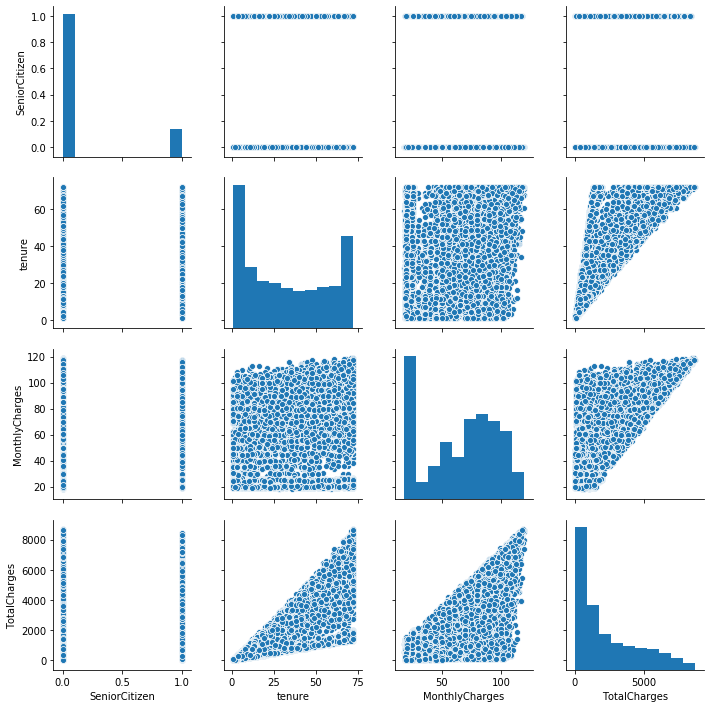

In [82]:
plt.figure()

sns.pairplot(customers)

plt.show()

## 3. Market segmentation

## 4. Churn Prediction

#### 4.1 Using Machine Learning Classifier Model without clustering step

##### Random Forest Classifier

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [170]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=50)

In [171]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
y_pred = rf.predict(X_test)

In [174]:
y_pred.shape

(1407,)

In [173]:
f1_score(y_test, y_pred)

0.5446153846153846

##### SVM Classifier non linear

In [188]:
svc = SVC(C=3)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
f1_score(y_test, y_pred_svc)

/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4473684210526316

⚠️ As you can see, many features are **categorical** data with more than 2 values. You will have to handle this.

1. **Data preparation and EDA**. ⚠️ **Reminder**: Never dive too fast into modeling and predictions. In order to build great models, you first need to spend some time on data exploration, cleaning, visualization, feature engineering, etc.
2. **Market segmentation** : use clusterings models to determine meaningful clusters of customers and try to label them according to their main characteristics.
3. **Churn prediction** : use classifers and train them with the labeled dataset. Use the **F-score** to evaluate your model performance and aim for the best score 🏆. You can now use your clusters as features and try to identify which variables are the most important.  
4. [**Bonus question** : try to use [dataiku](https://www.dataiku.com/) to solve the same problem.]
➡️ Does any cluster rank as one of the most important variables in your predictions ?

> 